## 2) Test using Shapiro-Wilk normality test the Ethereum returns for trading data every five minutes, from August 7, 2015 to April 15, 2024.

In [11]:
import pandas as pd
from scipy.stats import shapiro

In [12]:
file_path = r'raw data\ETH_1min.csv'
df = pd.read_csv(file_path)

In [13]:
df

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586995200000,2020-04-16 00:00:00,ETHUSD,152.94,152.94,151.33,151.33,112.724931
1,1586995140000,2020-04-15 23:59:00,ETHUSD,152.94,152.94,152.94,152.94,0.000000
2,1586995080000,2020-04-15 23:58:00,ETHUSD,153.17,153.17,152.94,152.94,0.013011
3,1586995020000,2020-04-15 23:57:00,ETHUSD,152.96,153.20,152.96,153.17,466.782278
4,1586994960000,2020-04-15 23:56:00,ETHUSD,153.14,153.14,152.96,152.96,167.930714
...,...,...,...,...,...,...,...,...
1984007,1462800960,2016-05-09 13:36:00,ETHUSD,10.00,10.00,10.00,10.00,0.375000
1984008,1462800900,2016-05-09 13:35:00,ETHUSD,10.00,10.00,10.00,10.00,60.000000
1984009,1462800840,2016-05-09 13:34:00,ETHUSD,10.00,10.00,10.00,10.00,8.000000
1984010,1462800780,2016-05-09 13:33:00,ETHUSD,12.00,12.00,10.00,10.00,43.497506


In [14]:
print(df.head())

   Unix Timestamp                 Date  Symbol    Open    High     Low  \
0   1586995200000  2020-04-16 00:00:00  ETHUSD  152.94  152.94  151.33   
1   1586995140000  2020-04-15 23:59:00  ETHUSD  152.94  152.94  152.94   
2   1586995080000  2020-04-15 23:58:00  ETHUSD  153.17  153.17  152.94   
3   1586995020000  2020-04-15 23:57:00  ETHUSD  152.96  153.20  152.96   
4   1586994960000  2020-04-15 23:56:00  ETHUSD  153.14  153.14  152.96   

    Close      Volume  
0  151.33  112.724931  
1  152.94    0.000000  
2  152.94    0.013011  
3  153.17  466.782278  
4  152.96  167.930714  


In [15]:
print(df.tail())

         Unix Timestamp                 Date  Symbol  Open  High   Low  Close  \
1984007      1462800960  2016-05-09 13:36:00  ETHUSD  10.0  10.0  10.0   10.0   
1984008      1462800900  2016-05-09 13:35:00  ETHUSD  10.0  10.0  10.0   10.0   
1984009      1462800840  2016-05-09 13:34:00  ETHUSD  10.0  10.0  10.0   10.0   
1984010      1462800780  2016-05-09 13:33:00  ETHUSD  12.0  12.0  10.0   10.0   
1984011      1462800720  2016-05-09 13:32:00  ETHUSD   0.0  12.0   0.0   12.0   

            Volume  
1984007   0.375000  
1984008  60.000000  
1984009   8.000000  
1984010  43.497506  
1984011   4.156276  


In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample data to 5-minute intervals using the mean of 'Close'
five_min_data = df['Close'].resample('5min').mean()

In [17]:
returns = five_min_data.pct_change(fill_method=None).dropna()

In [18]:
shapiro_test = shapiro(returns)

# Print the results
print("Shapiro-Wilk test statistic:", shapiro_test.statistic)
print("p-value:", shapiro_test.pvalue)

Shapiro-Wilk test statistic: 0.5677262056811241
p-value: 3.3156783192513663e-189


C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 396800.
  res = hypotest_fun_out(*samples, **kwds)


### Considering Alternatives - Histogram and Q-Q Plot

#### Histogram

In [21]:
import matplotlib.pyplot as plt
import scipy.stats as stats

Text(0.5, 1.0, 'Histogram of Returns')

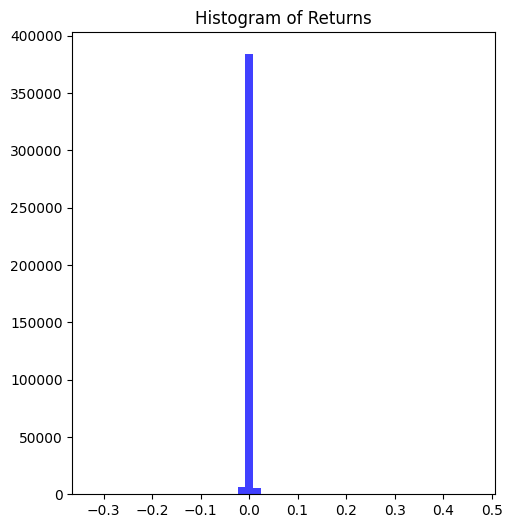

In [22]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(returns, bins=50, alpha=0.75, color='blue')
plt.title('Histogram of Returns')

#### Q-Q Plot

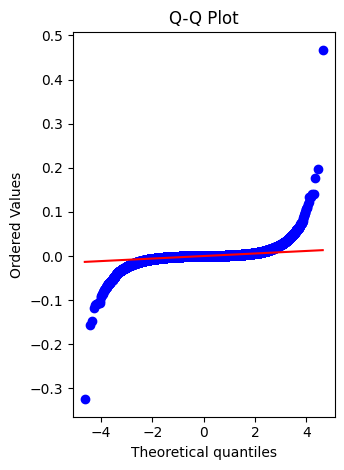

In [23]:
plt.subplot(122)
stats.probplot(returns, dist="norm", plot=plt)
plt.title('Q-Q Plot')

plt.tight_layout()
plt.show()